# Import & Analyze Data

In [58]:
# warning off
import warnings
warnings.filterwarnings('ignore')

# Data wrangling & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier     
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, f1_score, precision_score, recall_score

In [59]:
df = pd.read_csv('water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Not Potable: 0.6098901098901099
Potable: 0.3901098901098901


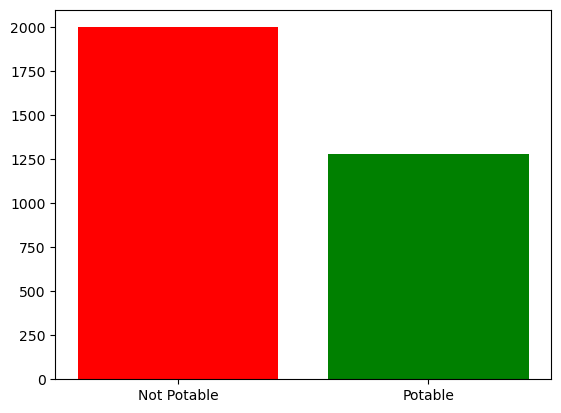

In [61]:
# Target variable distribution
plt.bar(['Not Potable', 'Potable'], df['Potability'].value_counts(), color=['red', 'green'])
print(f'Not Potable: {df.Potability.value_counts(normalize=True)[0]}')
print(f'Potable: {df.Potability.value_counts(normalize=True)[1]}')

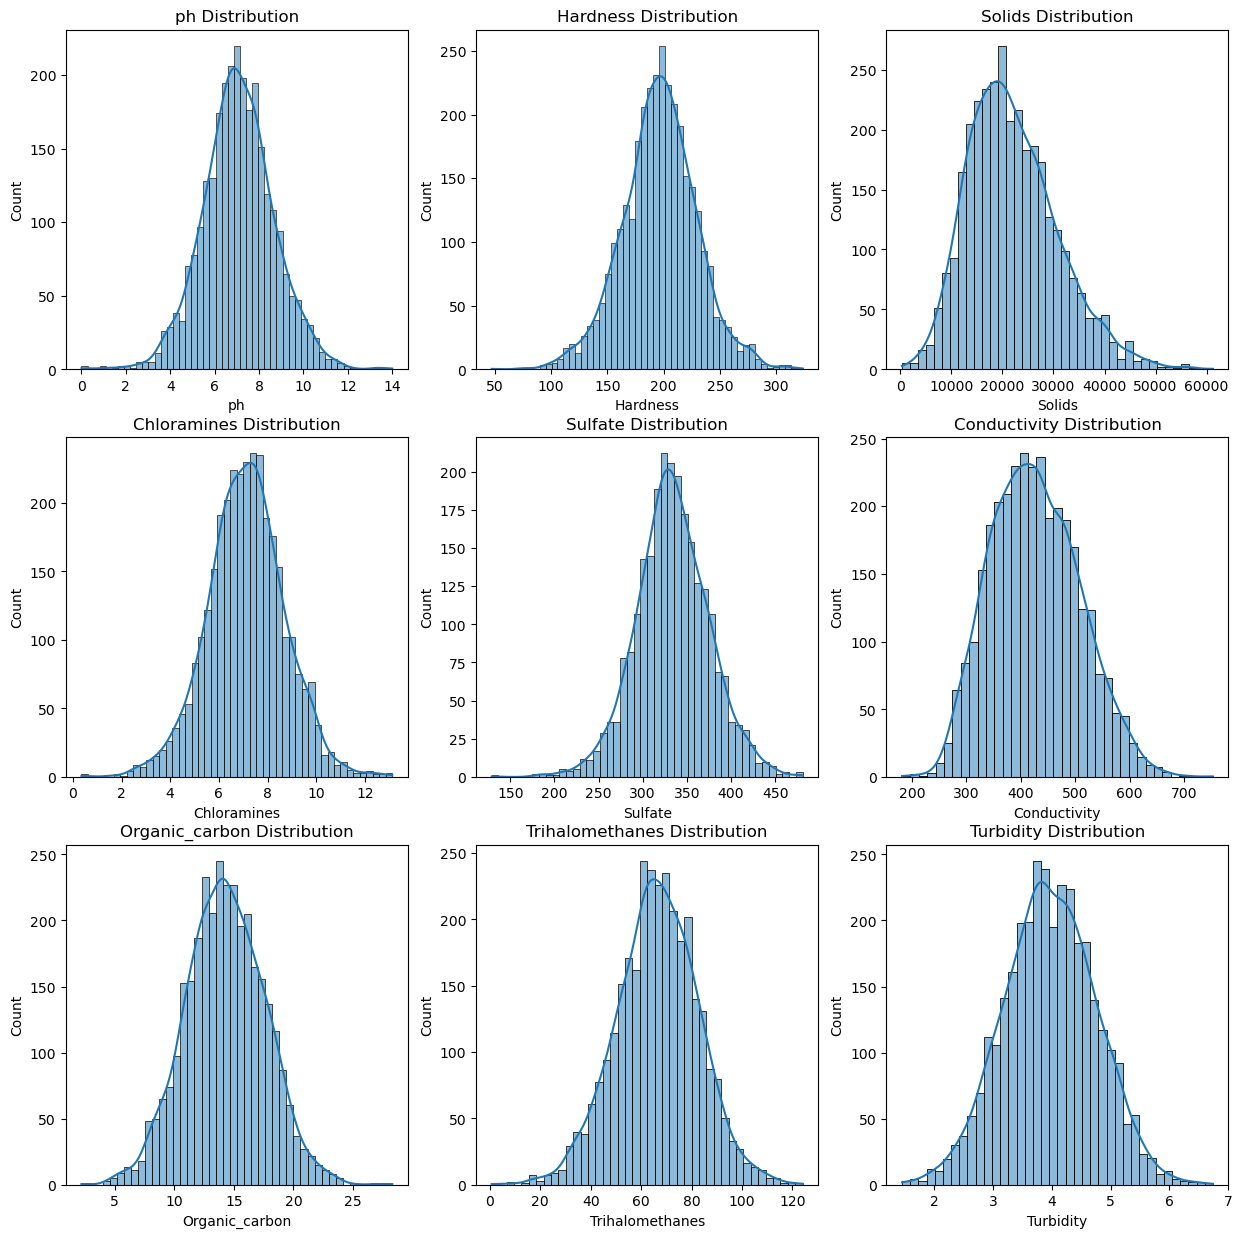

In [62]:
# Distribution for each feature

features = df.drop('Potability', axis=1).columns

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=ax[i//3, i%3], kde=True)
    ax[i//3, i%3].set_title(f'{feature} Distribution')

In [63]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [64]:
corr_matrix['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

# Data Preprocessing

In [65]:
def print_null_report(df):
    for i, j in enumerate(df.isna().sum()):
        print(f'{df.columns[i]:15} | {j*100/len(df):.2f}%')

print('Missing values report:')
print_null_report(df)

Missing values report:
ph              | 14.99%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 23.84%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 4.95%
Turbidity       | 0.00%
Potability      | 0.00%


In [66]:
# Handling missing value (gunakan imputasi untuk semuanya) berdasarkan class
df['ph'] = df.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.mean()))
df['Sulfate'] = df.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.mean()))
df['Trihalomethanes'] = df.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.mean()))

print_null_report(df)

ph              | 0.00%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 0.00%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 0.00%
Turbidity       | 0.00%
Potability      | 0.00%


In [67]:
# Handling Outlier

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers
    
def print_outlier(df):
    for i in df.columns:
        outliers = check_outlier(df[i])
        print(f'Number of Outliers for {i:16}:  {len(outliers)}')
    
print_outlier(df)

Number of Outliers for ph              :  142
Number of Outliers for Hardness        :  83
Number of Outliers for Solids          :  47
Number of Outliers for Chloramines     :  61
Number of Outliers for Sulfate         :  264
Number of Outliers for Conductivity    :  11
Number of Outliers for Organic_carbon  :  25
Number of Outliers for Trihalomethanes :  54
Number of Outliers for Turbidity       :  19
Number of Outliers for Potability      :  0


In [68]:
def handle_outlier(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Drop the outliers
        lower_outliers = np.where(df[i] <= lower_bound)[0]
        upper_outliers = np.where(df[i] >= upper_bound)[0]
        df.drop(index = upper_outliers, inplace = True)
        df.drop(index = lower_outliers, inplace = True)
        df.reset_index(drop=True, inplace=True)
        print(f'Column {i} has been processed')

handle_outlier(df)

Column ph has been processed
Column Hardness has been processed
Column Solids has been processed
Column Chloramines has been processed
Column Sulfate has been processed
Column Conductivity has been processed
Column Organic_carbon has been processed
Column Trihalomethanes has been processed
Column Turbidity has been processed
Column Potability has been processed


In [69]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

mm = MinMaxScaler()
X = mm.fit_transform(X)

In [70]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.25, stratify= y)

# Smote (only oversample the training data)
# from imblearn.under_sampling import RandomUnderSampler
# sm = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1992, 9), (665, 9), (1992,), (665,))

In [71]:
print(f'Distribusi target variable di train dan test set:{sum(y_train)/len(y_train), sum(y_test)/len(y_test)}')

Distribusi target variable di train dan test set:(0.37349397590361444, 0.3744360902255639)


In [72]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42, n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

PCA Tidak digunakan karena mengurangi hasil akurasi prediksi

# Modelling

In [73]:
# create class_weight for XGBoost
n_samples = len(y)
n_classes = len(np.unique(y))

count_pos_class = np.sum(y == 1)

# Calculate scale_pos_weight
scale_pos_weight = n_samples / (n_classes * count_pos_class)

In [74]:
# Set up all the models that will be used
knn = KNeighborsClassifier(weights='distance')
lr = LogisticRegression(class_weight='balanced', random_state=42)
svc = SVC(class_weight='balanced',random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False, scale_pos_weight=scale_pos_weight)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

skf = StratifiedKFold(n_splits=5)

In [75]:
# K-NN param RandomizedSearch

params = {
    'n_neighbors': np.arange(1, 31, 1),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(10, 101, 10),
    'p': [1, 2]
}

rs_knn = RandomizedSearchCV(knn, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

rs_knn.fit(X_train, y_train)
y_pred_knn = rs_knn.predict(X_test)
knn = rs_knn.best_estimator_
knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KNeighborsClassifier(algorithm='kd_tree', leaf_size=60, n_neighbors=24, p=1)

In [76]:
# Logistic Regression param RandomizedSearch

params = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

# Instantiate cross validated logistic regression random search
rs_lr = RandomizedSearchCV(lr, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_lr.fit(X_train, y_train)
y_pred_lr = rs_lr.predict(X_test)
lr = rs_lr.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [77]:
# Support Vector Classifier param RandomizedSearch

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10, 100]
}

# Instantiate cross validated Support Vector Classifier random search
rs_svc = RandomizedSearchCV(svc, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_svc.fit(X_train, y_train)
y_pred_svc = rs_svc.predict(X_test)
svc = rs_svc.best_estimator_
svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


SVC(C=100, class_weight='balanced', gamma=0.1, random_state=42)

In [78]:
# Decision Tree param RandomizedSearch

params = {
    'max_depth': [None, 3, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12]
}

# Instantiate cross validated Decision Tree random search
rs_dt = RandomizedSearchCV(dt, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_dt.fit(X_train, y_train)
y_pred_dt = rs_dt.predict(X_test)
dt = rs_dt.best_estimator_
dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [79]:
# XGBoostClassifier param RandomizedSearch

params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Instantiate cross validated XGBoostClassifier random search
rs_xgb = RandomizedSearchCV(xgb, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='aucpr', eval_set = [(X_test, y_test)])
y_pred_xgb = rs_xgb.predict(X_test)
xgb = rs_xgb.best_estimator_
xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	validation_0-aucpr:0.75634
[1]	validation_0-aucpr:0.76451
[2]	validation_0-aucpr:0.76451
[3]	validation_0-aucpr:0.76651
[4]	validation_0-aucpr:0.77510
[5]	validation_0-aucpr:0.78009
[6]	validation_0-aucpr:0.77967
[7]	validation_0-aucpr:0.78502
[8]	validation_0-aucpr:0.78136
[9]	validation_0-aucpr:0.78203
[10]	validation_0-aucpr:0.78155
[11]	validation_0-aucpr:0.78208
[12]	validation_0-aucpr:0.78194
[13]	validation_0-aucpr:0.81204
[14]	validation_0-aucpr:0.82362
[15]	validation_0-aucpr:0.82502
[16]	validation_0-aucpr:0.82364
[17]	validation_0-aucpr:0.82418
[18]	validation_0-aucpr:0.83280
[19]	validation_0-aucpr:0.83244
[20]	validation_0-aucpr:0.83540
[21]	validation_0-aucpr:0.83456
[22]	validation_0-aucpr:0.83675
[23]	validation_0-aucpr:0.83542
[24]	validation_0-aucpr:0.83596
[25]	validation_0-aucpr:0.83617
[26]	validation_0-aucpr:0.83591
[27]	validation_0-aucpr:0.83597
[28]	validation_0-aucpr:0.83627
[29]	validation_0-auc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
# Random Forest params

params = {
        'n_estimators': [50, 100, 200, 300, 400, 500],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'max_features': ['sqrt', 'log2'],  
        'bootstrap': [True]
}

# Instantiate cross validated Decision Tree random search
rs_rf= RandomizedSearchCV(rf, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_rf.fit(X_train, y_train)
y_pred_rf = rs_rf.predict(X_test)
rf = rs_rf.best_estimator_
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_split=9,
                       n_estimators=400, random_state=42)

In [81]:
voting_clf = VotingClassifier(estimators=[('knn', rs_knn), 
                                          ('lr', rs_lr), 
                                          ('svc', rs_svc), 
                                          ('dt', rs_dt)],
                                          voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vc = voting_clf.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [82]:
from sklearn.model_selection import cross_val_score
crossval_score = cross_val_score(voting_clf, X, y, cv=skf, scoring='accuracy')
voting_clf_bestscore = crossval_score.max()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each

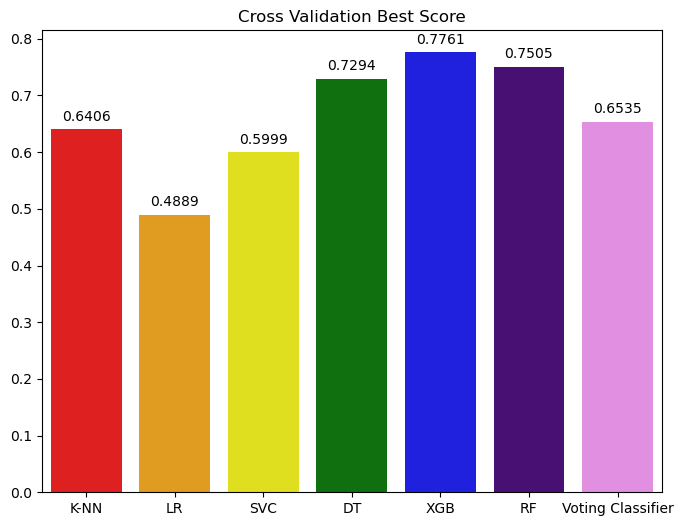

In [83]:
# model cross validation score
x = ['K-NN', 'LR', 'SVC', 'DT', 'XGB', 'RF', 'Voting Classifier']
y = [rs_knn.best_score_, rs_lr.best_score_, rs_svc.best_score_, rs_dt.best_score_, rs_xgb.best_score_, rs_rf.best_score_, voting_clf_bestscore]

plt.figure(figsize=(8, 6))
sns.barplot(x=x, y=y, palette=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
plt.title('Cross Validation Best Score')

for i in range(len(x)):
    plt.text(i, y[i] + 0.01, round(y[i], 4), ha='center', va='bottom')
    
plt.show()

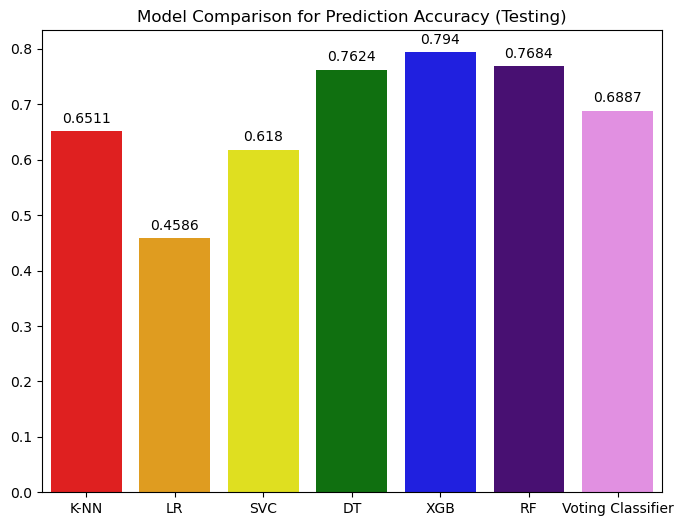

In [84]:
# Model Comparison for Prediction Accuracy (Testing)
x = ['K-NN', 'LR', 'SVC', 'DT', 'XGB', 'RF', 'Voting Classifier']
y = [knn.score(X_test, y_test), lr.score(X_test, y_test), svc.score(X_test, y_test), dt.score(X_test, y_test), xgb.score(X_test, y_test), rf.score(X_test, y_test), voting_clf.score(X_test, y_test)]

plt.figure(figsize=(8, 6))
sns.barplot(x=x, y=y, palette=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
plt.title('Model Comparison for Prediction Accuracy (Testing)')

for i in range(len(x)):
    plt.text(i, y[i] + 0.01, round(y[i], 4), ha='center', va='bottom')
    
plt.show()

# **Model Performance Analysis (From best to worst)**

## XGB Performance

In [85]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       416
           1       0.79      0.63      0.70       249

    accuracy                           0.80       665
   macro avg       0.79      0.77      0.77       665
weighted avg       0.80      0.80      0.79       665



In [86]:
print(f'Training score : {round(rs_xgb.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(rs_xgb.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_xgb, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_xgb, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_xgb, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_xgb), 4)}')

Training score : 0.8665
Testing score  : 0.794
Weighted Precision score: 0.7972
Weighted Recall score: 0.7985
Weighted f1 score: 0.7932
ROC - AUC score: 0.7656


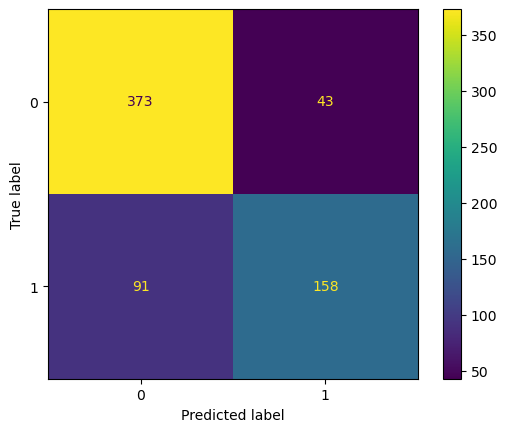

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

## RF Performance

In [88]:
y_pred_rf = rf.predict(X_test)
# evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       416
           1       0.68      0.71      0.70       249

    accuracy                           0.77       665
   macro avg       0.75      0.76      0.76       665
weighted avg       0.77      0.77      0.77       665



In [89]:
print(f'Training score : {round(rf.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(rf.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_rf, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_rf, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_rf, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_rf), 4)}')

Training score : 0.8494
Testing score  : 0.7684
Weighted Precision score: 0.771
Weighted Recall score: 0.7684
Weighted f1 score: 0.7695
ROC - AUC score: 0.7577


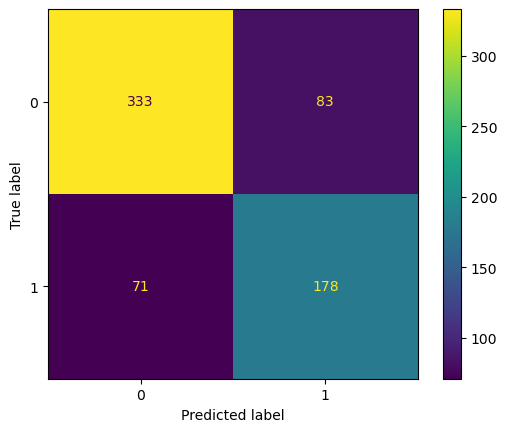

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

## Decision Tree Performance

In [91]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       416
           1       0.69      0.67      0.68       249

    accuracy                           0.76       665
   macro avg       0.75      0.74      0.75       665
weighted avg       0.76      0.76      0.76       665



In [92]:
print(f'Training score : {round(dt.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(dt.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_dt, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_dt, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_dt, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_dt), 4)}')

Training score : 0.8891
Testing score  : 0.7624
Weighted Precision score: 0.7613
Weighted Recall score: 0.7624
Weighted f1 score: 0.7618
ROC - AUC score: 0.744


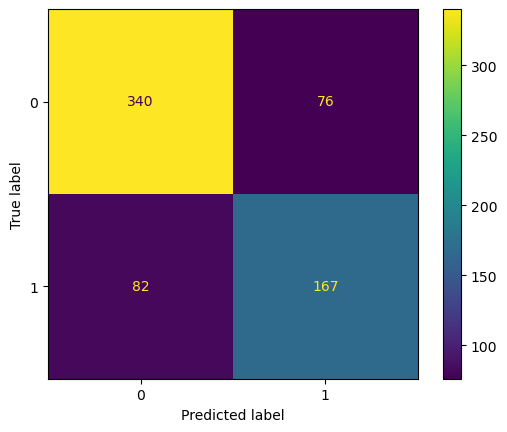

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

## Voting Classifier Performance

In [94]:
print(classification_report(y_test, y_pred_vc))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       416
           1       0.71      0.29      0.41       249

    accuracy                           0.69       665
   macro avg       0.70      0.61      0.60       665
weighted avg       0.69      0.69      0.65       665



In [95]:
print(f'Training score : {round(voting_clf.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(voting_clf.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_vc, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_vc, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_vc, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_vc), 4)}')


Training score : 0.744
Testing score  : 0.6887
Weighted Precision score: 0.6932
Weighted Recall score: 0.6887
Weighted f1 score: 0.6469
ROC - AUC score: 0.6085


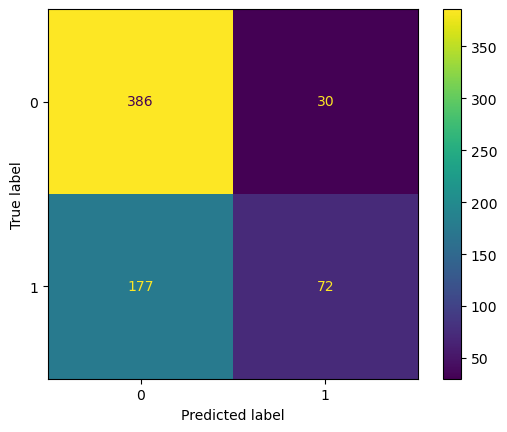

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_vc)

## K-Nearest Neighbors Performance

In [97]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       416
           1       0.64      0.16      0.25       249

    accuracy                           0.65       665
   macro avg       0.65      0.55      0.51       665
weighted avg       0.65      0.65      0.58       665



In [98]:
print(f'Training score : {round(knn.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(knn.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_knn, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_knn, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_knn, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_knn), 4)}')

Training score : 0.6767
Testing score  : 0.6511
Weighted Precision score: 0.6475
Weighted Recall score: 0.6511
Weighted f1 score: 0.5775
ROC - AUC score: 0.5519


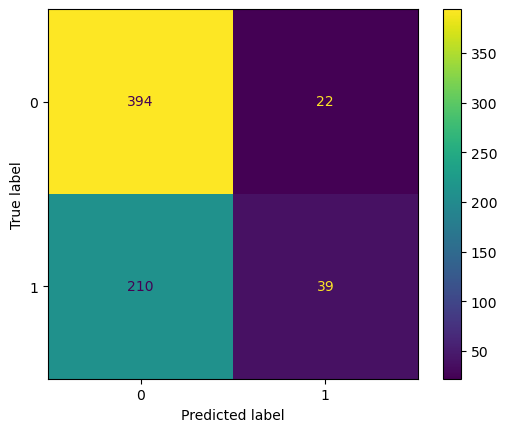

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

# SVM Classifier Performance

In [100]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       416
           1       0.49      0.48      0.49       249

    accuracy                           0.62       665
   macro avg       0.59      0.59      0.59       665
weighted avg       0.62      0.62      0.62       665



In [101]:
print(f'Training score : {round(svc.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(svc.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_svc, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_svc, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_svc, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_svc), 4)}')

Training score : 0.6546
Testing score  : 0.618
Weighted Precision score: 0.6168
Weighted Recall score: 0.618
Weighted f1 score: 0.6174
ROC - AUC score: 0.5907


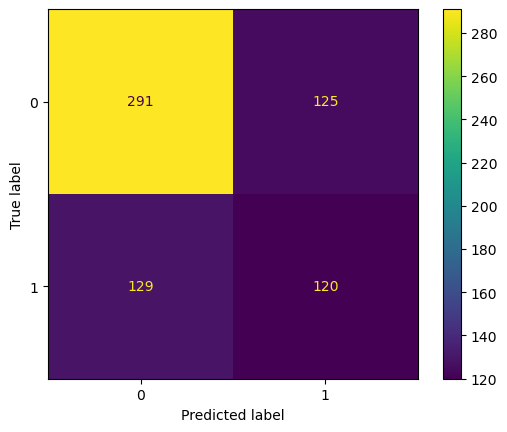

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

## Logistic Regression Performance

In [103]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52       416
           1       0.33      0.44      0.38       249

    accuracy                           0.46       665
   macro avg       0.46      0.46      0.45       665
weighted avg       0.49      0.46      0.47       665



In [104]:
print(f'Training score : {round(lr.score(X_train, y_train), 4)}')
print(f'Testing score  : {round(lr.score(X_test, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred_lr, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred_lr, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred_lr, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred_lr), 4)}')

Training score : 0.5246
Testing score  : 0.4586
Weighted Precision score: 0.4897
Weighted Recall score: 0.4586
Weighted f1 score: 0.4673
ROC - AUC score: 0.4553


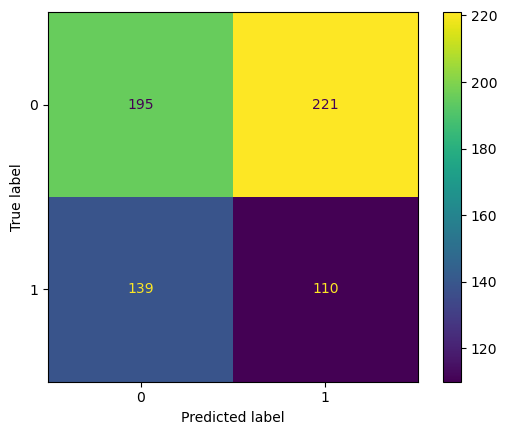

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

In [107]:
# Exporting the scaler and model
import pickle as pkl
pkl.dump(rs_xgb, open('models/xgb_model.pkl', 'wb'))
pkl.dump(rs_knn, open('models/knn_model.pkl', 'wb'))
pkl.dump(rs_lr, open('models/lr_model.pkl', 'wb'))
pkl.dump(rs_svc, open('models/svc_model.pkl', 'wb'))
pkl.dump(rs_dt, open('models/dt_model.pkl', 'wb'))
pkl.dump(rs_rf, open('models/rf_model.pkl', 'wb'))
pkl.dump(voting_clf, open('models/voting_clf_model.pkl', 'wb'))
pkl.dump(mm, open('scaler.pkl', 'wb'))